# Procesamiento de lenguaje natural (NLP)

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/NLP_pipeline.jpeg)
Fuente de la imagen: Turing.com

## 1. Segmentación de enunciados

![](https://s3.amazonaws.com/work-sample-images/blog_segmentation.jpg)
Fuente de la imagen: tm-town.com

## 2.  Tokenization

![](https://miro.medium.com/max/1400/1*UhfwmhMN9sdfcWIbO5_tGg.jpeg)
Fuente de la imagen: Medium.com

## 3. Stemming y  4. Lemmatization

![](https://miro.medium.com/max/640/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)
Fuente de la imagen: medium.com

![](https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/img/stemmingvslemma.png)
Fuente de la imagen: businessprocessincubator.com


## 5. Stop words
![](https://user.oc-static.com/upload/2021/01/06/16099626487943_P1C2.png)
Fuente de la imagen: openclassrooms.com

## 6. Dependency parsing

(Análisis de dependencia). Se utiliza principalmente para averiguar cómo se relacionan entre sí todas las palabras de una oración. Para encontrar la dependencia, podemos construir un árbol y asignar una sola palabra como palabra principal. El verbo principal de la oración actuará como el nodo raíz.
![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)
Fuente: RealPython.


## 7. Part of speech tagging

(Etiquetado de parte del discurso).

![](https://miro.medium.com/max/640/1*004yTJkoLe7g8KC8V7-ULw.png)
Fuente de la imagen: medium.com

![](https://www.researchgate.net/profile/Cigdem-Aytekin-3/publication/337773927/figure/fig1/AS:832915193733120@1575593865084/Natural-Language-Processing-Topics-Adali-2013-4.png)
Fuente de la imagen: Sutcu, Cem Sefa & Aytekin, Cigdem. (2019)

![](https://files.realpython.com/media/NLP-for-Beginners-Pythons-Natural-Language-Toolkit-NLTK_Watermarked.16a787c1e9c6.jpg)
Fuente de la imagen: realpython.com

In [13]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/isidro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1. Segmentación de enunciados

In [14]:
text = "An ambitious campus expansion plan was proposed by Fr. Vernon F. Gallagher in 1952. Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law. It was during the tenure of F. Henry J. McAnulty that Fr. Gallagher's ambitious plans were put to action."

In [15]:
# Training a new model with the text.
tokenizer = PunktSentenceTokenizer()
tokenizer.train(text)

In [16]:
# It automatically learns the abbreviations.
tokenizer._params.abbrev_types

set()

In [17]:
# Use the customized tokenizer.
tokenizer.tokenize(text)

['An ambitious campus expansion plan was proposed by Fr.',
 'Vernon F. Gallagher in 1952.',
 'Assumption Hall, the first student dormitory, was opened in 1954, and Rockwell Hall was dedicated in November 1958, housing the schools of business and law.',
 'It was during the tenure of F. Henry J. McAnulty that Fr.',
 "Gallagher's ambitious plans were put to action."]

### Tokenization

In [18]:
sent = "I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!"

In [19]:
print(word_tokenize(sent))

['I', 'will', 'walk', '500', 'miles', 'and', 'I', 'would', 'walk', '500', 'more', ',', 'just', 'to', 'be', 'the', 'man', 'who', 'walks', 'a', 'thousand', 'miles', 'to', 'fall', 'down', 'at', 'your', 'door', '!']


In [20]:
print(sent_tokenize(sent))

['I will walk 500 miles and I would walk 500 more, just to be the man who walks a thousand miles to fall down at your door!']


Stop-words

### Ejemplo: combinando web scrapping con NLP

In [21]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://www.oralytics.com/"
html = urlopen(url).read()
print(html)

b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]-->\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Oralytics</title>\n<link rel="profile" href="http://gmpg.org/xfn/11">\n<link rel="pingback" href="https://oralytics.com/xmlrpc.php">\n\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<meta name="google-site-verification" content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" />\n<meta name="msvalidate.01" content="0BD71865719D64AC53DCB30DFD743DCA" />\n\n<!-- Async WordPress.com Remote Login -->\n<script id="wpcom_remote_login_js">\nvar wpcom_remote_login_extra_auth = \'\';\nfunction wpcom_remote_login_remove_dom_node_id( element_id ) {\n\tvar dom_node = d

In [22]:
soup = BeautifulSoup(html)
print(soup)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Oralytics</title>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://oralytics.com/xmlrpc.php" rel="pingback"/>
<meta content="max-image-preview:large" name="robots"/>
<meta content="5_gehZ06ILCmVK6_yUuquF6FvfE2_DWklNxXChPDtmA" name="google-site-verification"/>
<meta content="0BD71865719D64AC53DCB30DFD743DCA" name="msvalidate.01"/>
<!-- Async WordPress.com Remote Login -->
<script id="wpcom_remote_login_js">
var wpcom_remote_login_extra_auth = '';
function wpcom_remote_login_remove_dom_node_id( element_id ) {
	var dom_node = document.getElementById( element_id

In [23]:
text = soup.get_text()
print(text)

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = 'n'.join(chunk for chunk in chunks if chunk)

print(text)

 



Oralytics




































































































Oralytics
By Brendan Tierney


-




Blog
My Books
Consulting Services
Oracle Icon Images
Data Sets

Scottish Whisky – Updated
Irish Whiskey Distilleries
CAO Points & Profiling since 2015
Leaving Certificate grade per Subject since 2015
Data Sets for Data Analytics/Science


My Shop
Contact Me
Oracle Magazine Collection
 




What does Legacy really mean? 

Posted on November 15, 2022 Updated on November 15, 2022 

In the IT industry we hear the term “legacy” being using, but that does it mean?  It can mean a lot of different things and it really depends on the person who is saying it, their context, what they want to portray and their intended meaning. In a lot of cases people seem to use it without knowing the meaning or the impact it can have. This can result in negative impact and not in the way the person intended.
 Before looking at some (and there can be lots) possi

In [24]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
words = word_tokenize(text)
print(words)

# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
print(filtered_words)

[nltk_data] Downloading package stopwords to /home/isidro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'itself', 'during', 'didn', 'my', 'there', 'll', 're', 'if', 'to', "that'll", 'hers', 'wasn', 'been', 'being', 'whom', 'further', 'ma', 'who', 'up', 'just', 'her', 'over', "you're", 'off', 'himself', "isn't", 'them', 'o', 'down', "won't", 's', 'of', 'why', "you'll", 't', 'too', 'can', "you've", 'both', 'out', 'do', "should've", 'an', 'doesn', 'some', 'as', 'by', 'on', 'him', "didn't", 'we', 'had', 'at', 'nor', 'so', 'aren', 'a', 'yours', 'yourself', 'i', 'such', 'which', 'that', 'ourselves', 'in', 'other', "couldn't", 'mightn', 'isn', 'own', 'each', 've', 'for', 'myself', 'hadn', 'you', 'below', "hasn't", 'ours', 'no', 'then', 'now', 'yourselves', "mustn't", 'again', 'same', 'having', 'through', 'because', 'am', "doesn't", 'does', 'they', 'wouldn', 'under', 'doing', 'herself', 'ain', "weren't", 'he', 'into', 'will', 'needn', 'me', 'mustn', 'this', 'should', "aren't", 'when', 'not', 'couldn', 'have', 'where', 'from', 'shouldn', 'how', 'between', 'these', 'his', "hadn't", 'once', 'here'

['oralyticsnoralyticsnby', 'brendan', 'booksnconsulting', 'servicesnoracle', 'icon', 'imagesndata', 'setsnscottish', 'whisky', 'updatednirish', 'whiskey', 'distilleriesncao', 'points', 'profiling', 'since', 'certificate', 'grade', 'per', 'subject', 'since', 'sets', 'data', 'shopncontact', 'menoracle', 'magazine', 'collectionnwhat', 'legacy', 'really', 'mean', 'nposted', 'november', 'updated', 'november', 'industry', 'hear', 'term', 'legacy', 'using', 'mean', 'nit', 'mean', 'lot', 'different', 'things', 'really', 'depends', 'person', 'saying', 'context', 'want', 'portray', 'intended', 'meaning', 'lot', 'cases', 'people', 'seem', 'use', 'without', 'knowing', 'meaning', 'impact', 'result', 'negative', 'impact', 'way', 'person', 'looking', 'lots', 'possible', 'meanings', 'lets', 'look', 'one', 'person', 'said', 'migrating', 'away', 'legacy', 'databases', 'like', 'oracle', 'seem', 'like', 'daunting', 'undertaking', 'businesses', 'nto', 'give', 'context', 'quote', 'person', 'works', 'company

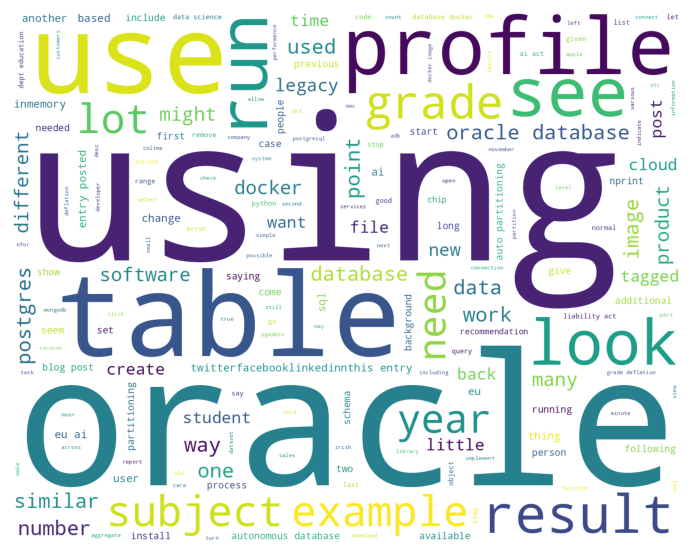

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=1000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=500, height=400,
random_state=1).generate(' '.join(filtered_words))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()